# Notes

In [14]:
import cv2
import pytesseract

import numpy as np
import matplotlib.pyplot as plt 
import PIL
from PIL import Image, ImageOps
import numpy
from sklearn import preprocessing
import re
from matplotlib.patches import Rectangle

plt.rcParams['font.family']='serif'
plt.figure(dpi=500)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

<Figure size 3000x2000 with 0 Axes>

PNG
(1287, 482)
RGBA


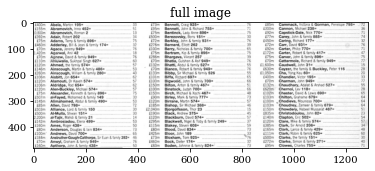

In [51]:
im = Image.open(r'C:\Users\Research\Documents\GitHub\econ\billionaires\uk\image (12).png')


print(im.format)
print(im.size)
print(im.mode)

plt.imshow(im,cmap='Greys_r')
plt.title('full image')
plt.show()

482
1287 429.0


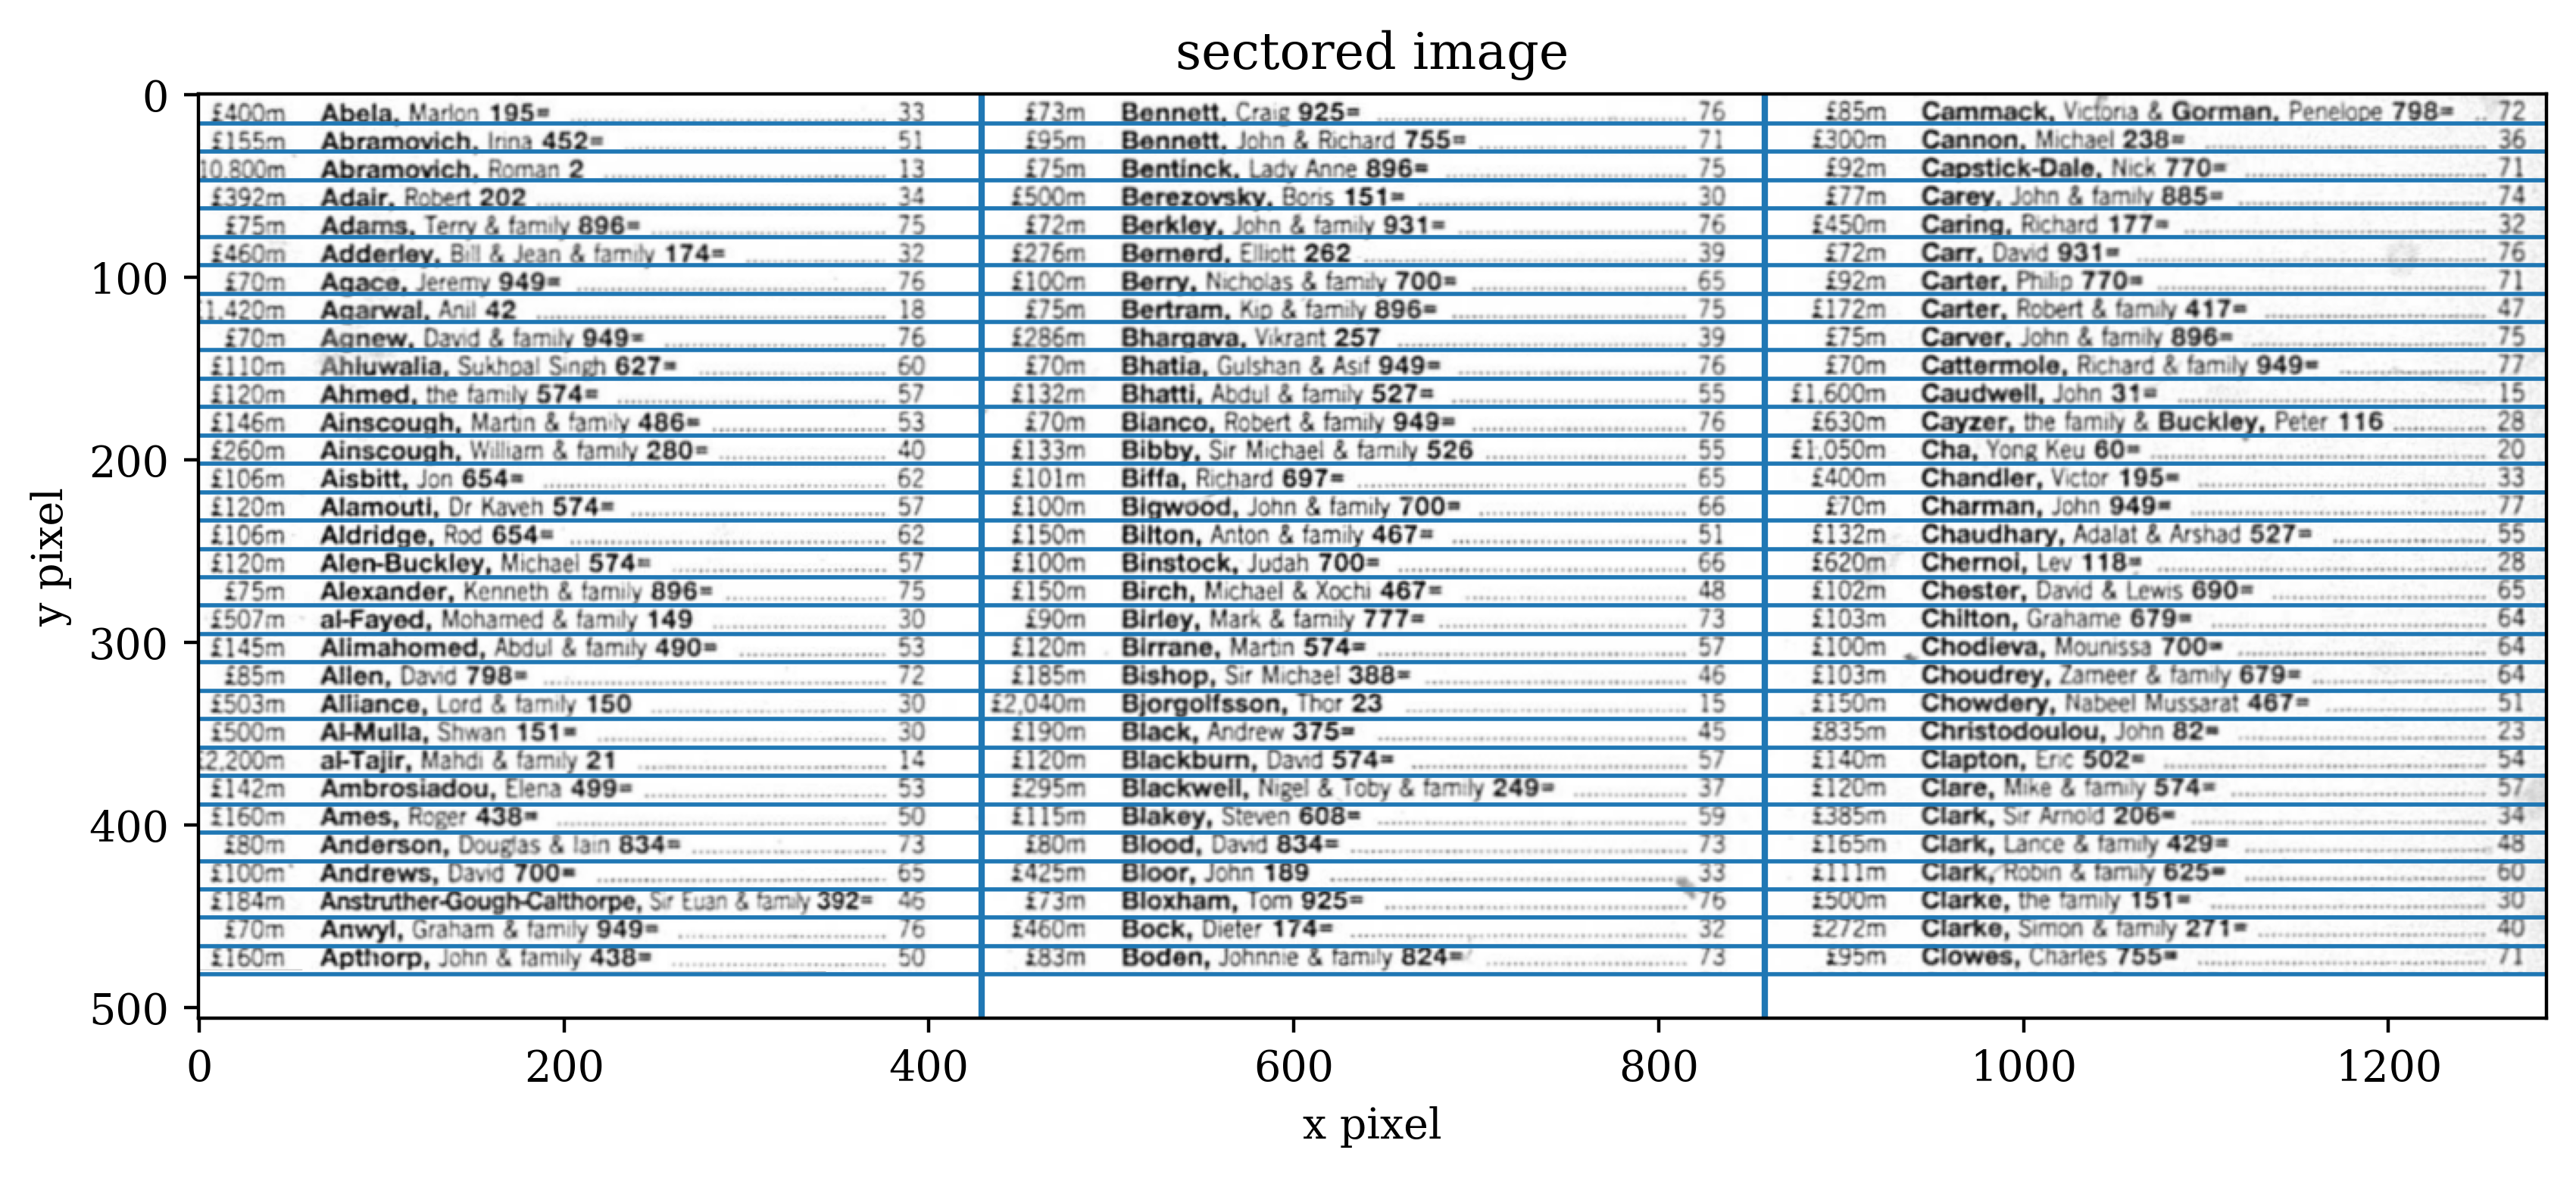

In [52]:
fig, ax = plt.subplots(figsize=(10,5), dpi=400)


ax.imshow(im,cmap='Greys_r')


dimensions = im.size

x_max = dimensions[0]
y_max = dimensions[1]
print(y_max)
print(x_max, x_max/3)

for i in range(1, 3): 
    ax.axvline(x=i*x_max/3)

for i in range(31):
    ax.axhline(i*(-y_max/31)+y_max, lw=1)

ax.set(title='sectored image', xlabel='x pixel', ylabel='y pixel')
plt.show()

€400m Abela. Marion 195=||33||
(0, 0, 429.0, 15.548387096774206)


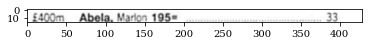

In [53]:
cell = im.crop((0,0,x_max/3,y_max-(30*(y_max/31))))

text = pytesseract.image_to_string(cell)
text = text.replace('\n', '@')
text = re.sub('@+', '||', text)
print(text)

plt.imshow(cell,cmap='Greys_r')

print((0,0,x_max/3,y_max-(30*(y_max/31))))

## possible issue note
* `y` could be read as `v` due to cutoff

In [54]:
print((0,0,x_max/3,y_max-(30*(y_max/31))))

(0, 0, 429.0, 15.548387096774206)


(0.0, 0.0, 429.0, 15.548387096774206)


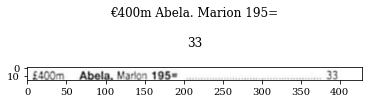

(0.0, 15.548387096774206, 429.0, 31.096774193548356)


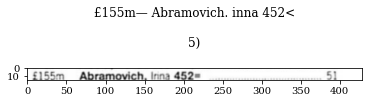

(0.0, 31.096774193548356, 429.0, 46.64516129032256)


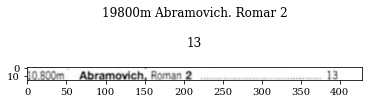

(0.0, 46.64516129032256, 429.0, 62.19354838709677)


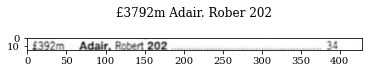

(0.0, 62.19354838709677, 429.0, 77.74193548387098)


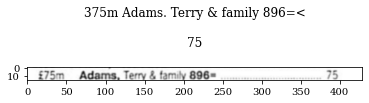

(0.0, 77.74193548387098, 429.0, 93.29032258064512)


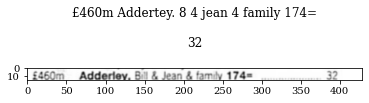

In [61]:
x_bounds = [i*x_max/3 for i in range(1, 3)]

y_bounds = [i*(-y_max/31)+y_max for i in range(1,31)][::-1]

counter = 0


for x_index, x_bound in enumerate(x_bounds): 
    for y_index, y_bound in enumerate(y_bounds): 
        if counter < 6: 

            if x_index == 0: 
                x_left = 0.0
            
            else: 
                x_left = x_bounds[x_index-1]

            if y_index == 0: 
                y_top = 0.0

            else: 
                y_top = y_bounds[y_index-1]    



            print((x_left,y_top,x_bound,y_bound))

            cell = im.crop((x_left,y_top,x_bound,y_bound))
            
            text = pytesseract.image_to_string(cell)

            plt.imshow(cell,cmap='Greys_r')
            plt.title(text)
            plt.show()
            
            plt.clf()
            plt.close()
            counter+=1



## full image?

In [63]:
full_text = pytesseract.image_to_string(im)

print(full_text)

 

Abela, Marion 195=
ramovich, inna 452=

‘Adams, Terry & family 896
Addertoy, Bil & Jean & family 174=
Agace, Jeremy 949"

Agarwal, Anil 42

Agnew, David & family 949
Ahluwalia, Sukhoal Singh 627=
‘Ahmed, the famuly 574=
Ainscough, Martin & family 486=
Ainscough, Wiliam & famly 280=
Aisbitt, Jon'654=

Alamouti, Or Kaven 574=
Aldridge, Rod 654= ...
Alen-Buckley, Michael 574=
Alexander, Kenneth & tarmily 896=
al-Fayed, Mohamed & family 149
Alimahomed, Abdul & family 490=
Allen, David 798=

Alliance, Lord & tamly 150
AbMulla, Shwan 151=

hai & family 21

 

Anderson, Douglas & lain 634%
Davie 700:

Andrews, :

, Se Euan & family 382=
Anwyl, Graham & family 949=
Apthorp, Jonn & family 438=

Bennett, Craig 925=
Bennett, John & Richard 755"

Bomerd, Eliot! 262
family
Bibby, Sir Michael & family 526

Biffa, Richard 697=
Bi John & family 700=

 

igwood,
Bilton, Anton & family 467= ..
Binstock, Judah 700= .
Birch, Michael & Xochi 467=
Birloy, Mark & family 777=
Birrane, Marin 574=

 

Cammac

## higher res...this prob won't work

PNG
(1276, 438)
RGBA
438
1276 638.0


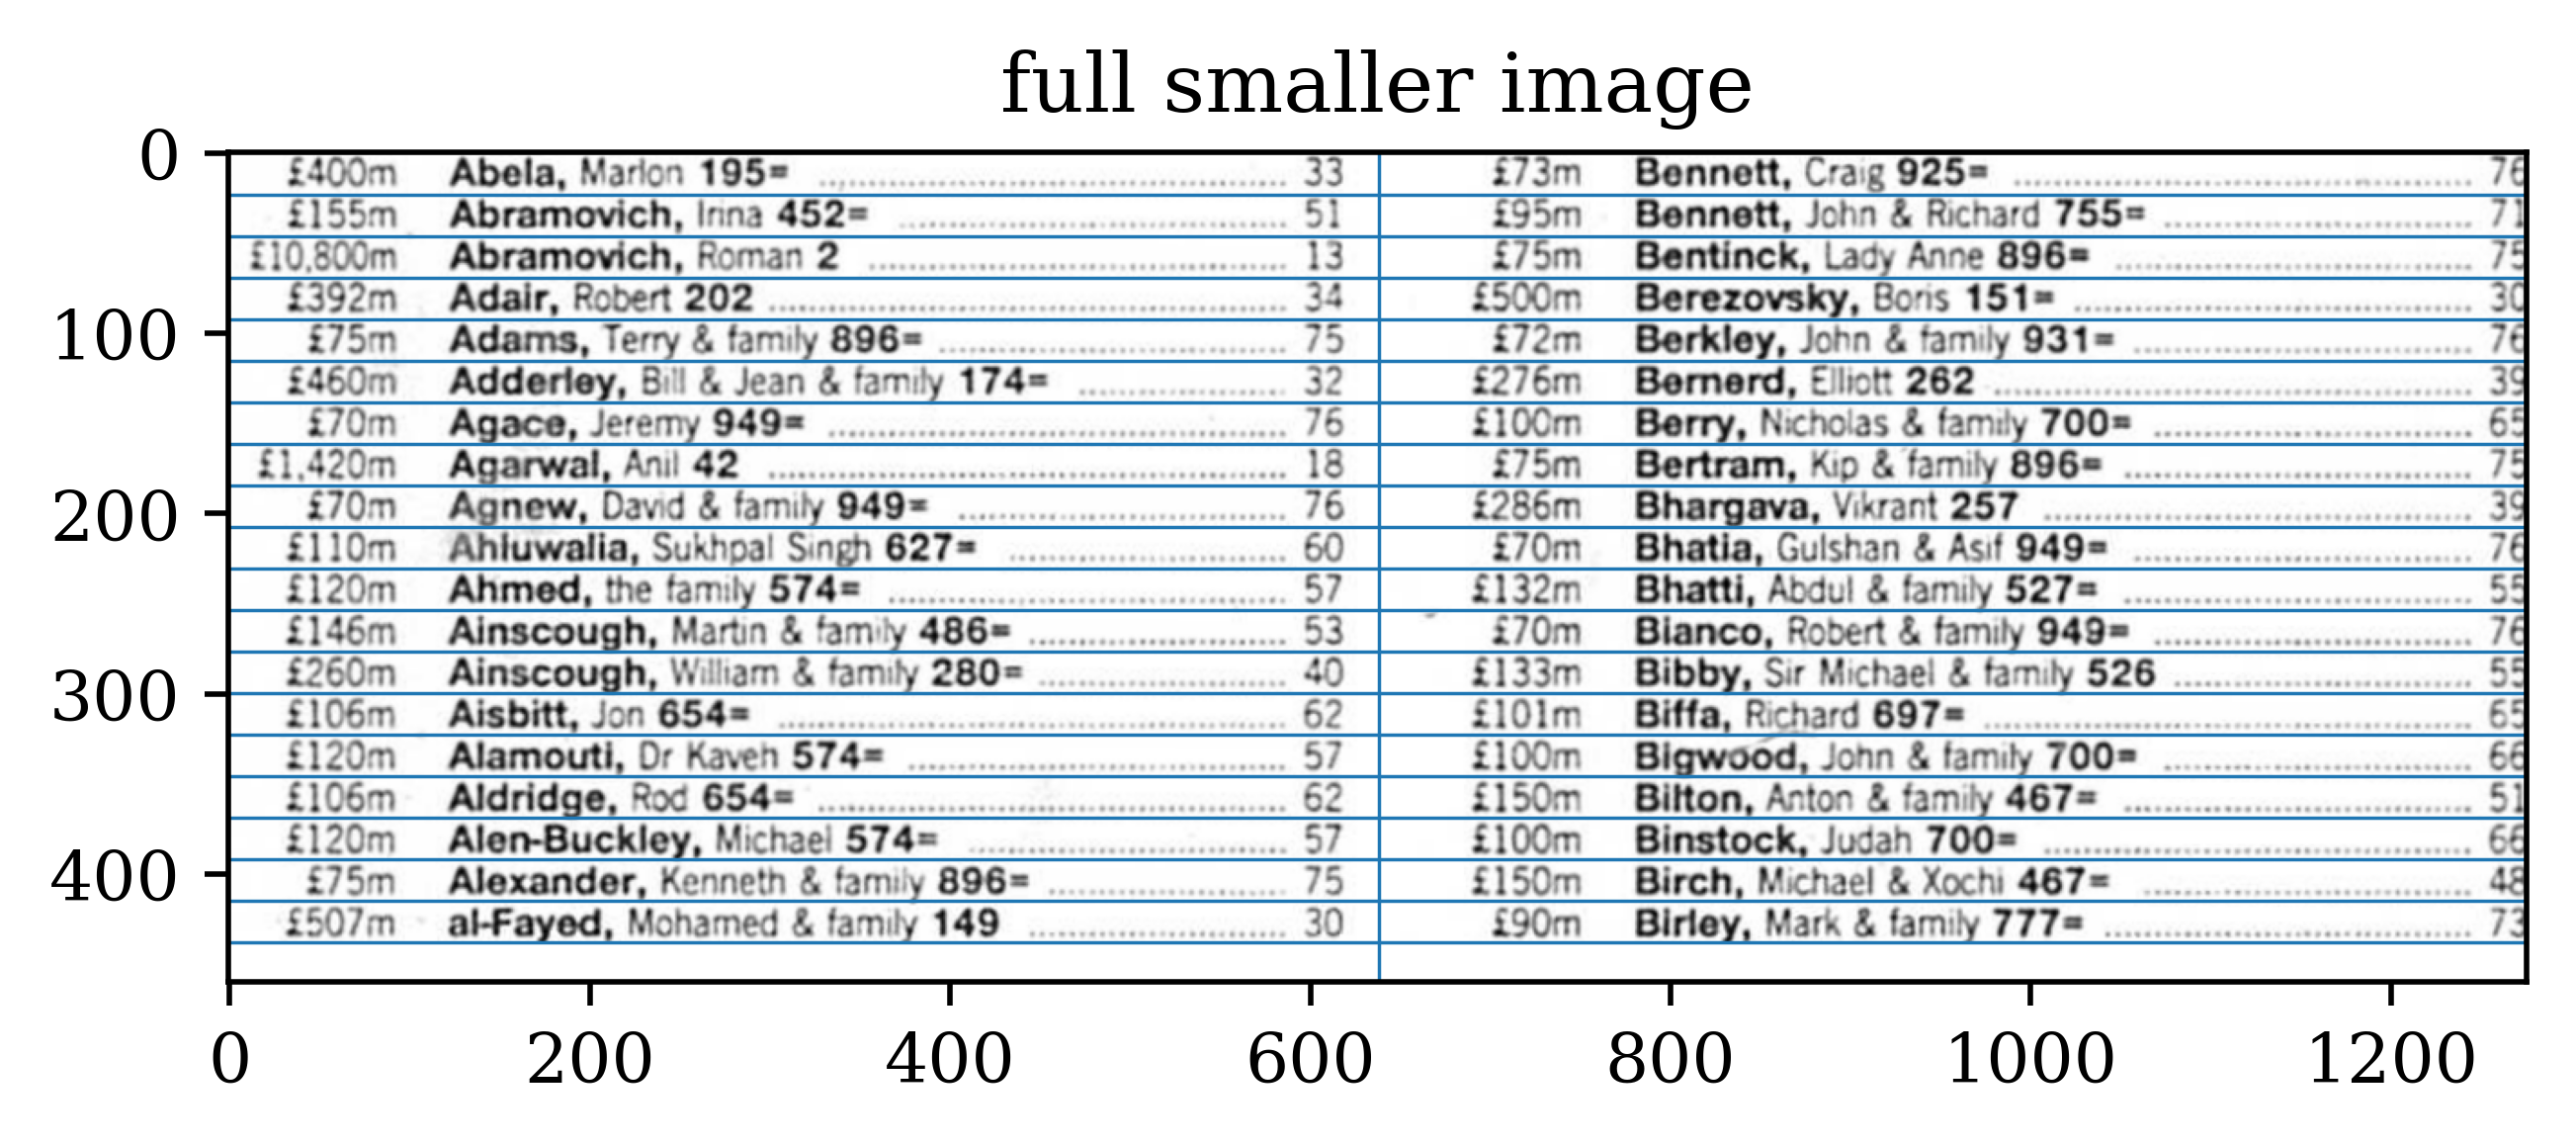

In [71]:
im2 = Image.open(r'C:\Users\Research\Documents\GitHub\econ\billionaires\uk\image (13).png')


fig, ax = plt.subplots(dpi=500)

print(im2.format)
print(im2.size)
print(im2.mode)

ax.imshow(im2,cmap='Greys_r')

dimensions = im2.size

x_max = dimensions[0]
y_max = dimensions[1]

print(y_max)
print(x_max, x_max/2)

for i in range(1, 2): 
    ax.axvline(x=i*x_max/2, lw=0.5)

for i in range(19):
    ax.axhline(i*(-y_max/19)+y_max, lw=.5)


plt.title('full smaller image')
plt.show()

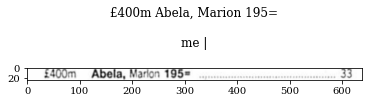

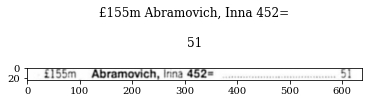

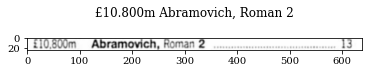

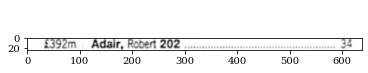

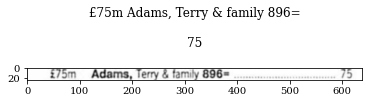

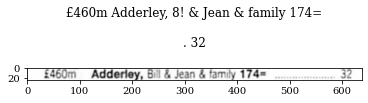

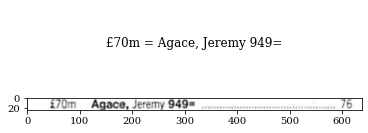

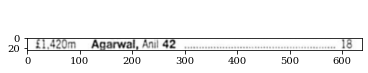

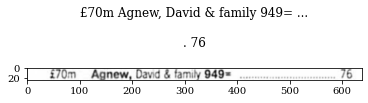

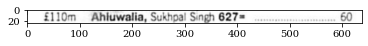

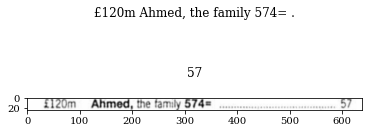

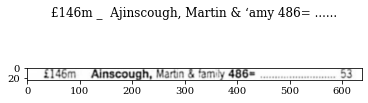

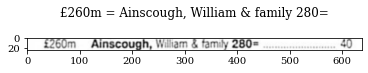

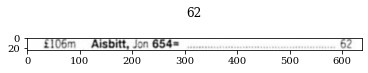

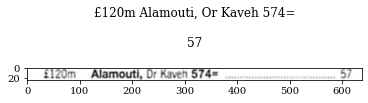

In [74]:
x_bounds = [i*x_max/2 for i in range(1, 2)]

y_bounds = [i*(-y_max/19)+y_max for i in range(1,19)][::-1]

counter = 0


for x_index, x_bound in enumerate(x_bounds): 
    for y_index, y_bound in enumerate(y_bounds): 
        if counter < 15: 

            if x_index == 0: 
                x_left = 0.0
            
            else: 
                x_left = x_bounds[x_index-1]

            if y_index == 0: 
                y_top = 0.0

            else: 
                y_top = y_bounds[y_index-1]    

            #print((x_left,y_top,x_bound,y_bound))

            cell = im2.crop((x_left,y_top,x_bound,y_bound))
            
            text = pytesseract.image_to_string(cell)
            text.replace('\n',' ')

            plt.imshow(cell,cmap='Greys_r')
            plt.title(text)
            plt.show()
            
            plt.clf()
            plt.close()
            counter+=1

